<a href="https://colab.research.google.com/github/KhaledOuchene/autamtisation/blob/main/Projet_d'automatisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*** Projet : " automatiser la prise de décision pour approuver les marges de crédit sur les domiciliaire ", L'objectif est d'utiliser ces informations pour automatiser la décision d'approuver ou non une marge de crédit sur une maison, en se basant sur des critères prédéfinis.***

Les variables :
## BAD : Indique si le client a déjà eu un défaut de remboursement de crédit (1 pour oui, 0 pour non).
##LOAN : Le montant du crédit demandé.
##MORTDUE : Le montant dû sur l'hypothèque existante.
##VALUE : La valeur de la propriété.
##REASON : La raison de l'octroi du crédit, comme la consolidation du crédit, les modifications sur la propriété ou d'autres raisons.
##JOB : La catégorie professionnelle du demandeur de crédit.
##YOJ : Le nombre d'années dans le boulot actuel du demandeur.
##DEROG (Dérogations) : C'est le nombre de signalements importants qui dévient des normes habituelles. En d'autres termes, il s'agit du nombre de fois où une personne a enfreint les règles ou a eu des problèmes sérieux avec ses comptes de crédit.
##DELINQ (Défaut de paiement) : Ce chiffre indique le nombre de lignes de crédit qui ont des paiements en retard ou qui sont en souffrance. Cela montre combien de fois quelqu'un n'a pas réussi à payer ses dettes à temps.
##CLAGE (Âge de la plus ancienne ligne de crédit) : C'est le nombre de mois depuis l'ouverture de la plus ancienne ligne de crédit d'une personne. Cela indique depuis combien de temps cette personne utilise le crédit.
##NINQ (Nombre de demandes de crédit récentes) : Il s'agit du nombre de demandes de crédit effectuées récemment par une personne. Cela donne une idée de l'activité récente de recherche de crédit d'une personne.
##CLNO (Nombre total de lignes de crédit) : C'est simplement le nombre total de comptes de crédit que quelqu'un a ouverts.
##DEBTINC (Ratio dette/revenu) : C'est le ratio entre la dette d'une personne et son revenu. Cela montre à quel point une personne est endettée par rapport à ce qu'elle gagne.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt
import sklearn
import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import os

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LinearRegression
import datetime
from google.colab import drive
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [6]:
##importing the data base :
!git clone https://github.com/KhaledOuchene/automatisation.git
%cd automatisation
data = pd.read_csv("data.csv")
data.head()


Cloning into 'automatisation'...
fatal: could not read Username for 'https://github.com': No such device or address
[Errno 2] No such file or directory: 'automatisation'
/content/autamtisation/autamtisation


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [7]:
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


In [9]:
data.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [10]:
data.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


##les variables importantes sont ;
BAD , LOAN , MORTDUE , VALUE ,REASON , JOB , YOJ , DEROG

In [15]:
print(data)

      BAD   LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0       1   1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1       1   1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2       1   1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3       1   1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4       0   1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   
...   ...    ...      ...       ...      ...     ...   ...    ...     ...   
5955    0  88900  57264.0   90185.0  DebtCon   Other  16.0    0.0     0.0   
5956    0  89000  54576.0   92937.0  DebtCon   Other  16.0    0.0     0.0   
5957    0  89200  54045.0   92924.0  DebtCon   Other  15.0    0.0     0.0   
5958    0  89800  50370.0   91861.0  DebtCon   Other  14.0    0.0     0.0   
5959    0  89900  48811.0   88934.0  DebtCon   Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
0      94.366667   1.0   9.0     

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [16]:
##types of the variables in the dataset :
data_types = data.dtypes
print(data_types)

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object


In [19]:

columns_to_exclude = ["BAD", "LOAN", "MORTDUE", "VALUE"]

for col in data.columns:
    if col not in columns_to_exclude:
        unique_values = data[col].unique()
        print("Unique values of", col, ":", unique_values)



Unique values of REASON : ['HomeImp' nan 'DebtCon']
Unique values of JOB : ['Other' nan 'Office' 'Sales' 'Mgr' 'ProfExe' 'Self']
Unique values of YOJ : [10.5   7.    4.     nan  3.    9.    5.   11.   16.   18.    2.5   8.
 19.    4.5   2.   12.   22.   10.   26.    6.    1.    8.5  21.    1.5
 28.   20.   13.    1.6   3.5   0.5   1.8   0.    2.6  14.    0.1   0.4
 17.5   1.7   0.3  24.   15.    1.4  31.   23.    9.5  22.8   2.2   0.8
 25.   29.   27.   17.    5.6   0.6   6.5   7.5   5.5   9.9   3.8  12.6
  0.25  0.2  30.    2.3   0.9   7.2  17.6   0.7   2.9  13.5   3.7  12.9
 29.9  41.    0.75  8.8   6.6   7.4   9.2  19.5   1.3   5.3   4.6   1.9
  8.9   9.8   3.2   9.3  14.4   3.9  17.8  24.5  33.   36.   35.   34.
 28.5  32.    4.3   8.3 ]
Unique values of DEROG : [ 0. nan  3.  2.  1.  4.  5.  6.  7.  8.  9. 10.]
Unique values of DELINQ : [ 0.  2. nan  1.  6. 15.  4.  3.  5.  7.  8. 10. 12. 11. 13.]
Unique values of CLAGE : [ 94.36666667 121.83333333 149.46666667 ... 212.27969667 213

In [21]:
##data with just categorical vars ;
categorical_vars = data.select_dtypes(include=['object'])
categorical_vars.columns

Index(['REASON', 'JOB'], dtype='object')

In [22]:

numerical_vars = data.select_dtypes(include=['int64', 'float64'])
numerical_vars.columns



Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE',
       'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [24]:
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [28]:
data.duplicated().sum()

0

# DATA PREPROCESSING : ⚒

In [34]:
##DataPreprocessing :
from sklearn.preprocessing import StandardScaler, LabelEncoder
class DataPreprocessor:
    def __init__(self, data):
        self.data = data

    def handle_missing_values(self, method='mean', columns=None):
        if columns is None:
            columns = self.data.columns

        for col in columns:
            if method == 'mean':
                self.data[col].fillna(self.data[col].mean(), inplace=True)
            elif method == 'median':
                self.data[col].fillna(self.data[col].median(), inplace=True)
            elif method == 'mode':
                self.data[col].fillna(self.data[col].mode().iloc[0], inplace=True)
            elif method == 'forward_fill':
                self.data[col].fillna(method='ffill', inplace=True)
            elif method == 'backward_fill':
                self.data[col].fillna(method='bfill', inplace=True)

    def encode_categorical_variables(self, columns=None):
        if columns is None:
            columns = self.data.select_dtypes(include=['object']).columns

        for col in columns:
            le = LabelEncoder()
            self.data[col] = le.fit_transform(self.data[col])

    def scale_numerical_variables(self, columns=None):
        if columns is None:
            columns = self.data.select_dtypes(include=['int64', 'float64']).columns

        scaler = StandardScaler()
        self.data[columns] = scaler.fit_transform(self.data[columns])





In [35]:
preprocessor = DataPreprocessor(data)

In [36]:
#Handling missing data for the variables ;
preprocessor.handle_missing_values(method='forward_fill', columns=['MORTDUE'])
preprocessor.handle_missing_values(method='median', columns=['YOJ'])
preprocessor.handle_missing_values(method='backward_fill', columns=['VALUE','DELINQ', 'CLAGE',
       'NINQ', 'CLNO', 'DEBTINC'])
preprocessor.handle_missing_values(method='mode', columns=['JOB','REASON'])


In [39]:
#Handling missing data for the variable DEROG USING PREDICTIVE MODEL (LINEAR REGRESSION ) :
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Separate data into features (X) and target variable (y)
X = data.dropna().drop(['MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'], axis=1)
y = data.dropna()['DEROG']  # Choose the column to predict missing values for

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Extract indices of missing values in the 'DEROG' column
missing_indices = data[data['DEROG'].isnull()].index

# Prepare features (X) for prediction (using only rows corresponding to missing values)
X_predict = data.loc[missing_indices].drop(['MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'], axis=1)

# Predict missing values
predicted_values = model.predict(X_predict)

# Impute missing values
data.loc[missing_indices, 'DEROG'] = predicted_values



In [40]:
data.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [42]:
data.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,0.199497,18607.969799,73858.792426,101901.401181,8.756166,0.247696,0.448322,179.635147,1.173154,21.272315,34.025500
std,0.399656,11207.480417,44926.868157,57471.686905,7.259424,0.797107,1.122478,85.431920,1.701766,10.108416,8.342495
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46126.000000,66000.000000,3.000000,0.000000,0.000000,114.997391,0.000000,14.000000,29.295006
50%,0.000000,16300.000000,65000.000000,89407.500000,7.000000,0.000000,0.000000,173.500000,1.000000,20.000000,35.259693
75%,0.000000,23300.000000,91402.000000,120173.750000,12.000000,0.000000,0.000000,231.005708,2.000000,26.000000,39.206085
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


Composante YOJ (Ancienneté dans le poste actuel) :

Plus le nombre d'années dans le poste actuel est élevé, plus le score pondéré (Weighted_YOJ) sera élevé.
Une valeur élevée dans cette composante indique une stabilité professionnelle plus grande, ce qui peut être interprété comme une indication positive de la capacité du demandeur à maintenir un revenu stable.
Composante DEROG (Nombre de signalements dérogatoires majeurs) :

Un nombre élevé de signalements dérogatoires majeurs est associé à un risque financier plus élevé.
Une valeur élevée dans cette composante indique un risque potentiellement plus élevé pour le prêteur.
Score de stabilité financière :

Le score de stabilité financière est une combinaison pondérée de ces deux composantes. Un score plus élevé indique une stabilité financière plus élevée, tandis qu'un score plus bas peut indiquer un risque financier plus élevé.
Il est important de noter que les pondérations attribuées à chaque composante peuvent varier en fonction de la politique de prêt de l'institution financière et des préférences de risque.
En résumé, un score de stabilité financière plus élevé est généralement considéré comme positif, car il indique une stabilité professionnelle et financière plus grande, ainsi qu'un risque potentiellement plus faible pour le prêteur. Cependant, il est toujours important de prendre en compte d'autres facteurs et de réaliser une évaluation complète du risque avant d'accorder un prêt.

In [69]:



# Définir les pondérations pour chaque composante du score
weight_YOJ = 0.5
weight_DEROG = 0.5

# Calculer la variable pondérée pour l'ancienneté dans le poste actuel (YOJ)
data['Weighted_YOJ'] = data['YOJ']

# Créer une échelle de score pour le nombre de signalements dérogatoires majeurs (DEROG)
def calculate_derog_score(derog):
    if derog == 0:
        return 5
    elif derog == 1:
        return 3
    elif derog == 2:
        return 2
    else:
        return 1

data['DEROG_Score'] = data['DEROG'].apply(calculate_derog_score)

# Calculer le score de stabilité financière en combinant les composantes pondérées
data['Financial_Stability_Score'] = (weight_YOJ * data['Weighted_YOJ'] +
                                     weight_DEROG * data['DEROG_Score'])

data['Financial_Stability_Score'].describe()




count    5960.000000
mean        6.483620
std         3.756244
min         0.500000
25%         3.500000
50%         5.500000
75%         8.500000
max        23.000000
Name: Financial_Stability_Score, dtype: float64

Le score de stabilité financière est une combinaison pondérée de ces deux composantes. Un score plus élevé indique une stabilité financière plus élevée

Ratio prêt-valeur (LTV) :

Le ratio prêt-valeur est calculé en divisant le montant du prêt demandé par la valeur de la propriété. Il indique la proportion du prêt par rapport à la valeur de la propriété.
Un LTV plus élevé peut indiquer un risque plus élevé pour le prêteur, car le demandeur investit moins de capital propre dans la propriété.

In [49]:
# Calculer le ratio prêt-valeur (LTV)
data['LTV'] = data['LOAN'] / data['VALUE']
# Créer une échelle de score pour le ratio prêt-valeur (LTV)
def calculate_ltv_score(ltv):
    if ltv < 0.8:
        return 5
    elif ltv < 1:
        return 3
    else:
        return 1
data['LTV_Score'] = data['LTV'].apply(calculate_ltv_score)
data['LTV_Score'].describe()

count    5960.000000
mean        4.961074
std         0.304072
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: LTV_Score, dtype: float64

Score de la raison de l'octroi du crédit :

Vous pouvez attribuer des scores en fonction de la raison donnée pour l'octroi du crédit (DebtCon, HomeImp ou Other). Par exemple, vous pourriez considérer que les modifications de la propriété (HomeImp) sont moins risquées que les consolidations de dettes (DebtCon) ou d'autres raisons (Other).

In [53]:
# Créer une échelle de score pour la raison de l'octroi du crédit
reason_scores = {'DebtCon':4 , 'HomeImp':1 , 'Other': 6}
data['Reason_Score'] = data['REASON'].map(reason_scores)
data['Reason_Score']


0       1
1       1
2       1
3       4
4       1
       ..
5955    4
5956    4
5957    4
5958    4
5959    4
Name: Reason_Score, Length: 5960, dtype: int64

un score elevee est plus risquee

In [55]:
# Calculer le score de stabilité financière 2 en combinant les composantes pondérées
weight_LTV = 0.5
weight_Reason = 0.5

data['Financial_Stability_Score_2'] = (weight_LTV * data['LTV_Score'] +
                                       weight_Reason * data['Reason_Score'])
data['Financial_Stability_Score_2'].describe()

count    5960.000000
mean        4.032550
std         0.694316
min         2.000000
25%         3.000000
50%         4.500000
75%         4.500000
max         4.500000
Name: Financial_Stability_Score_2, dtype: float64

# ⭕ **visualisation**







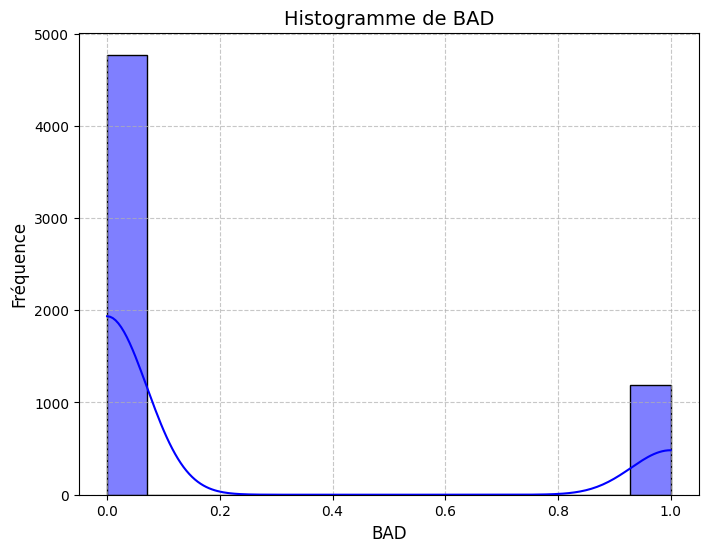

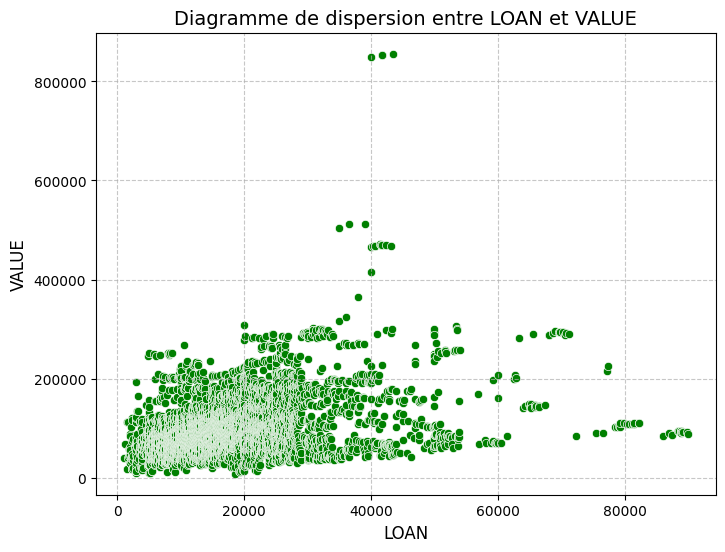

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns


class DataVisualizer:
    def __init__(self, data):
        self.data = data
        self.default_palette = sns.color_palette()

    def histogram(self, column, color=None):
        plt.figure(figsize=(8, 6))
        sns.histplot(self.data[column], kde=True, color=color if color else self.default_palette[0])
        plt.title(f'Histogramme de {column}', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Fréquence', fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()

    def boxplot(self, column, color=None):
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=self.data[column], color=color if color else self.default_palette[1])
        plt.title(f'Boîte à moustaches de {column}', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.xticks(fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()

    def scatterplot(self, x_column, y_column, color=None):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=self.data[x_column], y=self.data[y_column], color=color if color else self.default_palette[2])
        plt.title(f'Diagramme de dispersion entre {x_column} et {y_column}', fontsize=14)
        plt.xlabel(x_column, fontsize=12)
        plt.ylabel(y_column, fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()
# Créer une instance de DataVisualizer
visualizer = DataVisualizer(data)

# Visualiser l'histogramme d'une variable
visualizer.histogram('BAD', color='blue')

# Visualiser un diagramme de dispersion entre deux variables
visualizer.scatterplot('LOAN', 'VALUE', color='green')


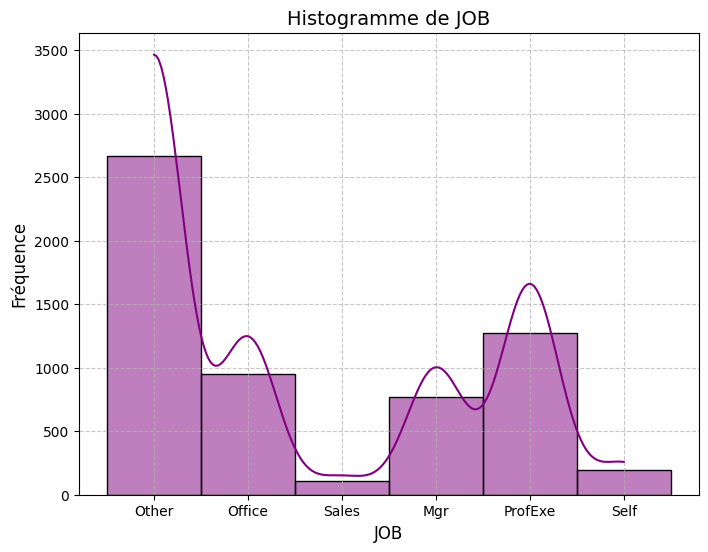

In [76]:
visualizer.histogram('JOB',color='purple')

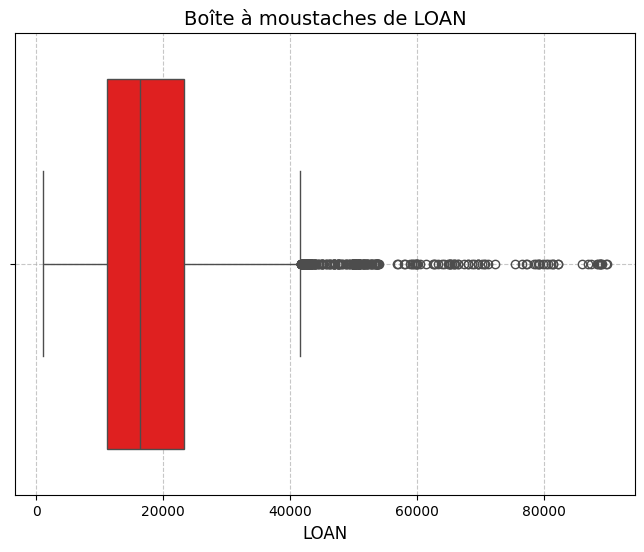

In [72]:
visualizer.boxplot("LOAN",color="red")